## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [20]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [21]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[len(data)-2:len(data)]

9996


['n00433802_5211\thttp://www.loudoungymnastics.com/images/Girls_doing_split%20jpg.jpg',
 '']

In [22]:
#because the final entry is empty after splitting, it should be removed
data_split = data[:-1]
data_split[len(data)-2:len(data)]

['n00433802_5211\thttp://www.loudoungymnastics.com/images/Girls_doing_split%20jpg.jpg']

In [28]:
##the output contains image index and url, we are separating them into two part
#open an empty array
number = []
url = []
for i in range(len(data_split)):
    new_list = data_split[i].split('\t')
    #print(new_list[1])
    number.append(new_list[0])
    url.append(new_list[1])
    
url


['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg',
 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg',
 'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg',
 'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg',
 'http://www.porschemania.it/discus/messages/815/102099.jpg',
 'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg',
 'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg',
 'http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg',
 'http://farm1.static.flickr.com/29/54608382_ee8bd4f7fa.jpg',
 'http://www.dierentuin.nl/images/jongengiraffe.jpg',
 'http://farm4.static.flickr.com/3279/3118

## 將 txt 轉成 pandas dataframe

In [29]:
import pandas as pd

arrange_data = {
    'number' : number,
    'url' : url
    
}

    
df = pd.DataFrame(arrange_data)
df.head()

,number,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [ ]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = 

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO

# read the first link of the data
first_link = df.loc[0, 'url']
#the second
secnd_link = df.loc[1, 'url']

response = requests.get(first_link)


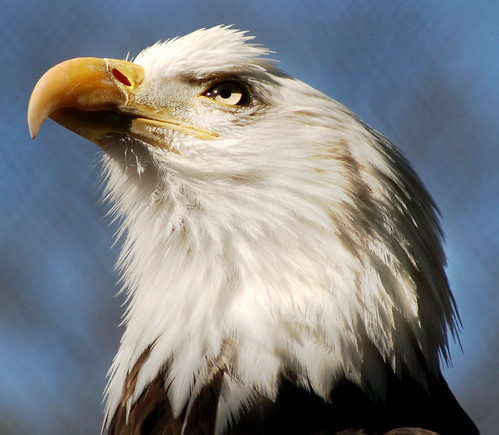

In [53]:
#The input of Image module is binary mode, that is, bytes. So we have to transform the response to bytes mode by using BytesIO (IO means 'input/output')

img = Image.open(BytesIO(response.content))
img

In [45]:
#convert img to numpy array
img = np.array(img)
img

array([[[ 81, 110, 150],
        [ 78, 110, 148],
        [ 75, 111, 145],
        ...,
        [ 88, 132, 171],
        [ 88, 132, 171],
        [ 89, 131, 171]],

       [[ 81, 110, 150],
        [ 78, 110, 148],
        [ 76, 110, 145],
        ...,
        [ 86, 131, 170],
        [ 87, 131, 170],
        [ 88, 130, 170]],

       [[ 78, 110, 149],
        [ 77, 109, 147],
        [ 78, 108, 144],
        ...,
        [ 86, 131, 170],
        [ 87, 131, 170],
        [ 88, 130, 170]],

       ...,

       [[ 84,  88,  87],
        [ 83,  87,  86],
        [ 86,  88,  85],
        ...,
        [ 73,  81,  84],
        [ 75,  80,  84],
        [ 76,  79,  84]],

       [[ 83,  87,  86],
        [ 82,  86,  85],
        [ 85,  87,  84],
        ...,
        [ 73,  81,  84],
        [ 75,  80,  84],
        [ 76,  79,  84]],

       [[ 83,  87,  86],
        [ 84,  86,  85],
        [ 83,  85,  82],
        ...,
        [ 73,  81,  84],
        [ 75,  80,  84],
        [ 76,  79,  84]]

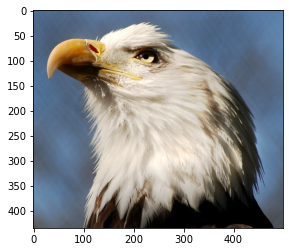

In [48]:
plt.imshow(img)
plt.show()

In [ ]:
# def img2arr_fromURLs(url_list, resize = False):
#     """
#     請完成這個 Function
#     Args
#         - url_list: list of URLs
#         - resize: bool
#     Return
#         - list of array
#     """
    
#     return img_list

In [49]:
#create a function for reading images and stack all of them in a array
def img2arr_fromURLs(url_list, resize = False):
    
    img_list = []
    
    for i in url_list:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        
        img_array = np.array(img)
        
        img_list.append(img_array)
        
    return img_list
        

Total images that we got: 4 


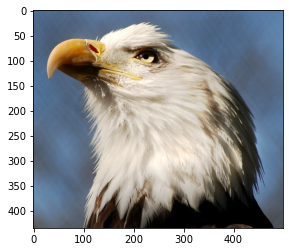

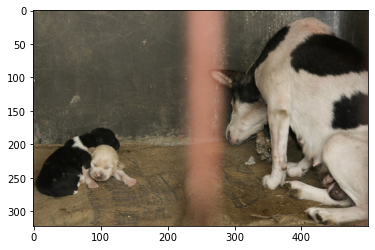

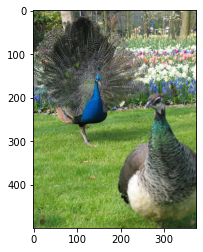

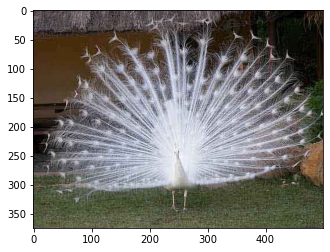

In [52]:
result = img2arr_fromURLs(df[0:4]['url'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

#print out the stacked image in the target array after getting the image from url
for im_get in result:
    plt.imshow(im_get)
    plt.show()